# IMPORT LIBRIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

READ FILE USA HOUSING PRICE DATASET

In [2]:
usa = pd.read_csv(r"D:\USA_Housing.csv")

In [3]:
usa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
usa.shape

(5000, 7)

ADDRESS IS UNIQUE COLUMN THEN DROP COLUMN

In [5]:
usa=usa.drop(['Address'],axis=1)


In [6]:
usa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


DATA SET INFORMATION

In [7]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


CHECKING THE NULL VALUES

In [8]:
usa.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

# DO SAMPLING

In [9]:
from sklearn.model_selection import train_test_split
usa_train, usa_test = train_test_split(usa, test_size = .2)

In [10]:
usa_train.shape

(4000, 6)

In [11]:
usa_test.shape

(1000, 6)

In [12]:
usa_train_x = usa_train.iloc[ : , 0 : -1]
usa_train_y = usa_train.iloc[ : , -1]

In [13]:
usa_test_x = usa_test.iloc[:, 0: -1]
usa_test_y = usa_test.iloc[:, -1]

In [14]:
usa_train_x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
163,73204.942132,6.640916,7.311912,6.40,35090.500810
3719,60861.192302,5.705720,5.880685,3.08,53548.076678
474,70879.908301,6.739318,7.626799,5.47,22431.606262
1308,62397.079734,5.873185,6.428539,3.41,40739.877347
2038,52122.954313,6.599764,7.910269,3.04,38764.820933


In [15]:
usa_train_y.head()

163     1.394518e+06
3719    1.321743e+06
474     1.137059e+06
1308    8.549455e+05
2038    1.221828e+06
Name: Price, dtype: float64

# MODEL BUILDING USING LINEAR REGRESSION ALGORITHM

In [16]:
from sklearn.linear_model import LinearRegression
lin_usa = LinearRegression()

FIT THE MODEL

In [17]:
lin_usa.fit(usa_train_x,usa_train_y)

LinearRegression()

In [18]:
pred_test = lin_usa.predict(usa_test_x)
pred_train = lin_usa.predict(usa_train_x)

In [19]:
pred_test

array([1238733.95347524, 1418126.74941839, 1058754.89997266,
       1470934.29044498, 1243449.96169461, 1064585.27051834,
       1577640.44137889,  655436.68296846, 1073445.3654858 ,
       1090905.68694311, 1123288.83827431,  298227.4150959 ,
        933216.98759765, 1464468.03647785, 2244545.45798841,
        841689.60664517, 1783599.89507796, 1337141.14821682,
        898089.92659984,  868296.49876711, 1708042.98564888,
       1134408.11177492, 1769961.31491052, 1374895.48989252,
       1644708.14512844, 1204233.61425238,  993428.46348716,
       1469579.63899282, 1068763.51143428, 1216798.79077485,
       1331012.00583258, 1388725.67135883,  481766.15330793,
       1695123.77340675, 1799983.90442938, 1443043.12729832,
       2227455.10185639, 1187988.56983161, 1346993.35186578,
       1277460.09605924,  372494.34979858,  533342.03857473,
       1894393.58141017, 1055407.80074764, 1144623.13911991,
        859364.69208014, 1760769.22028724, 1184370.75906507,
       1233224.2731756 ,

In [20]:
pred_train

array([1466424.23284345, 1148086.42949995, 1278554.6654986 , ...,
       1211779.74684411, 1013238.20121038, 1384725.57856774])

INTERCEPT

In [21]:
lin_usa.intercept_##Bo

-2636479.5525115347

COEFFICIENT

In [22]:
lin_usa.coef_

array([2.15773345e+01, 1.66007999e+05, 1.21068266e+05, 7.80420106e+02,
       1.51224935e+01])

# FEATURE IMPORTANTS

In [23]:
features_coef = pd.DataFrame()
features_coef['Features'] = usa_train_x.columns #slope
features_coef['Slope'] = lin_usa.coef_

In [24]:
features_coef.sort_values('Slope', ascending=False)

,Features,Slope
1,Avg. Area House Age,166007.999379
2,Avg. Area Number of Rooms,121068.266030
3,Avg. Area Number of Bedrooms,780.420106
0,Avg. Area Income,21.577334
4,Area Population,15.122494


RSQUARE ON TRAIN DATA

In [25]:
lin_usa.score(usa_train_x,usa_train_y )

0.9186389079273276

RSQUARE ON TEST DATA

In [26]:
lin_usa.score(usa_test_x, usa_test_y)

0.9154768384747058

ADJUSTED RSQUARE

In [27]:
##Adjusted Rsquare
N = usa_train_x.shape[0]
K = usa_train_x.shape[1]
adjRsquare = 1 - ((1-0.9189912377316047)* (N-1) / (N-K-1))
adjRsquare

0.9188898246591606

ERROR TRAIN AND ERROR TEST

In [28]:
err_train = usa_train_y -pred_train
err_test = usa_test_y - pred_test

In [29]:
err_train

163     -71905.817376
3719    173656.736674
474    -141495.477014
1308   -226975.115025
2038     91743.579659
            ...      
1656   -123537.624385
3894    -52383.064375
2912    155201.163037
1312    -78745.858826
4286   -112973.146618
Name: Price, Length: 4000, dtype: float64

In [30]:
pred_test

array([1238733.95347524, 1418126.74941839, 1058754.89997266,
       1470934.29044498, 1243449.96169461, 1064585.27051834,
       1577640.44137889,  655436.68296846, 1073445.3654858 ,
       1090905.68694311, 1123288.83827431,  298227.4150959 ,
        933216.98759765, 1464468.03647785, 2244545.45798841,
        841689.60664517, 1783599.89507796, 1337141.14821682,
        898089.92659984,  868296.49876711, 1708042.98564888,
       1134408.11177492, 1769961.31491052, 1374895.48989252,
       1644708.14512844, 1204233.61425238,  993428.46348716,
       1469579.63899282, 1068763.51143428, 1216798.79077485,
       1331012.00583258, 1388725.67135883,  481766.15330793,
       1695123.77340675, 1799983.90442938, 1443043.12729832,
       2227455.10185639, 1187988.56983161, 1346993.35186578,
       1277460.09605924,  372494.34979858,  533342.03857473,
       1894393.58141017, 1055407.80074764, 1144623.13911991,
        859364.69208014, 1760769.22028724, 1184370.75906507,
       1233224.2731756 ,

In [31]:
np.mean( err_train)

1.5785917639732362e-10

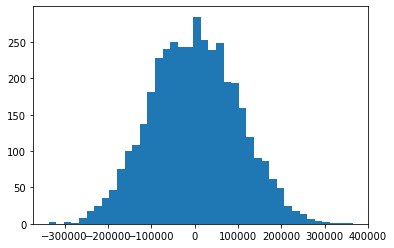

In [32]:
plt.hist(err_train, bins = 40);

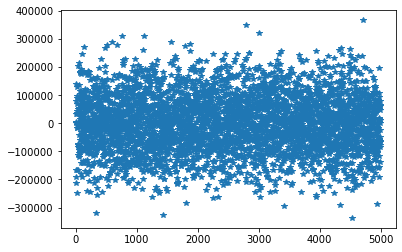

In [33]:
plt.plot(err_train, "*");

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
pred_Actual = pd.DataFrame()
pred_Actual['Actual'] = usa_train_y
pred_Actual['Predicted'] = pred_train

In [36]:
pred_Actual

,Actual,Predicted
163,1.394518e+06,1.466424e+06
3719,1.321743e+06,1.148086e+06
474,1.137059e+06,1.278555e+06
1308,8.549455e+05,1.081921e+06
2038,1.221828e+06,1.130084e+06
...,...,...
1656,1.153517e+06,1.277055e+06
3894,9.434698e+05,9.958529e+05
2912,1.366981e+06,1.211780e+06
1312,9.344923e+05,1.013238e+06


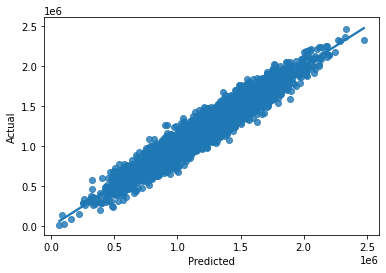

In [37]:
sns.regplot(y = 'Actual', x = 'Predicted', data = pred_Actual );

In [38]:
MSE = np.mean(np.square(err_test))
MSE

10503014469.456154

In [39]:
RMSE = np.sqrt(MSE)
RMSE

102484.21570884052

In [40]:
MAPE = np.mean(np.abs(err_test*100/usa_test_y))
MAPE

7.681433292453707

##====================================================================================================

# Apply decision Tree Regressor algorithm

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt_usa =  DecisionTreeRegressor()

FIT THE MODEL

In [42]:
dt_usa.fit(usa_train_x, usa_train_y)

DecisionTreeRegressor()

PREDICTION TRAIN DATA AND TEST DATA

In [43]:
pred_train = dt_usa.predict(usa_train_x)
pred_test = dt_usa.predict(usa_test_x)

In [44]:
pred_train

array([1394518.41546763, 1321743.16617417, 1137059.18848432, ...,
       1366980.90988088,  934492.34238447, 1271752.43195011])

In [45]:
pred_test

array([1224186.695926  , 1220591.00604205,  946479.23486147,
       1665515.24612232, 1341449.57159102, 1242114.10087935,
       1557075.42231083,  679228.99274684, 1287903.35219535,
       1181630.62516964,  840682.60887661,  485533.68035769,
        881443.92472646, 1558572.24327146, 2198564.57267471,
        812512.24125317, 1710570.1698087 , 1384478.30454825,
        809089.6719455 ,  813726.1138316 , 1814550.90142388,
       1311654.26289877, 1788829.2350512 , 1309768.19610935,
       1460450.98147615, 1252419.19639916, 1055153.31950921,
       1359838.99857874, 1267150.83668714, 1373512.30177617,
       1281113.31524688, 1394637.64997723,  541953.90568024,
       1550359.54846547, 1813857.82636129, 1558639.8810308 ,
       2220799.06915617, 1168993.75880055, 1270543.46419449,
       1530013.44887133,  497368.03679312,  437436.1382032 ,
       1737981.52983559,  928563.82155237, 1091143.39876233,
        963531.91523098, 1794212.18576671, 1251430.92031862,
       1120349.77312863,

ERROR TRAIN AND ERROR TEST DATA

In [46]:
err_train = usa_train_y - pred_train
err_test = usa_test_y - pred_test

In [47]:
err_train 

163     0.0
3719    0.0
474     0.0
1308    0.0
2038    0.0
       ... 
1656    0.0
3894    0.0
2912    0.0
1312    0.0
4286    0.0
Name: Price, Length: 4000, dtype: float64

In [48]:
np.mean(err_train)

0.0

In [49]:
err_test

538      38307.590903
1479    232721.461888
3387    132300.262237
4207     20452.402093
1407    -49162.476748
            ...      
2143       708.657279
3474    -49579.512522
2817    -15787.763656
813     145936.426377
2098    -38380.765894
Name: Price, Length: 1000, dtype: float64

# CHECKING ASSUMPTION

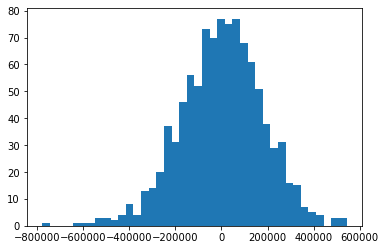

In [50]:
plt.hist(err_test, bins = 40);

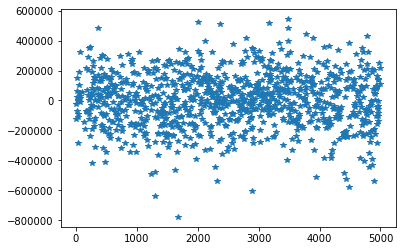

In [51]:
plt.plot(err_test, "*");

ACTUAL AND PREDICTED VALUE

In [52]:
pred_Actual = pd.DataFrame()
pred_Actual['Actual'] = usa_train_y
pred_Actual['Predicted'] = pred_train

In [53]:
pred_Actual

,Actual,Predicted
163,1.394518e+06,1.394518e+06
3719,1.321743e+06,1.321743e+06
474,1.137059e+06,1.137059e+06
1308,8.549455e+05,8.549455e+05
2038,1.221828e+06,1.221828e+06
...,...,...
1656,1.153517e+06,1.153517e+06
3894,9.434698e+05,9.434698e+05
2912,1.366981e+06,1.366981e+06
1312,9.344923e+05,9.344923e+05


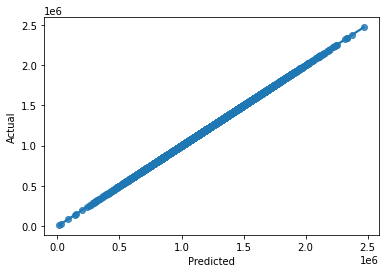

In [54]:
sns.regplot(y = 'Actual', x = 'Predicted', data = pred_Actual );

# RSQUARE ON TRAIN DATA

In [55]:
dt_usa.score(usa_train_x,usa_train_y )

1.0

# RSQUARE ON TEST DATA

In [56]:
dt_usa.score(usa_test_x,usa_test_y)

0.7388365085944149

ADJUSTED RSQUARE ON TRAIN DATA

In [57]:
##Adjusted Rsquare
N = usa_train_x.shape[0]
K = usa_train_x.shape[1]
adjRsquare = 1 - ((1-1.0)* (N-1) / (N-K-1))
adjRsquare

1.0

# MSE

In [58]:
MSE = np.mean(np.square(err_test))
MSE

32452689648.927593

# RMSE

In [59]:
RMSE = np.sqrt(MSE)
RMSE

180146.3006806623

# MAPE

In [60]:
MAPE = np.mean(np.abs(err_test*100/usa_test_y))
MAPE

13.369577122106563

##------------------------------------------------------------------------------------------

# RANDOM FOREST REGRESSION ALGORITHM

In [61]:
from sklearn.ensemble import RandomForestRegressor
RFR_usa = RandomForestRegressor(n_estimators=200)

In [62]:
RFR_usa.fit(usa_train_x, usa_train_y)

RandomForestRegressor(n_estimators=200)

In [63]:
pred_train = RFR_usa.predict(usa_train_x)
pred_test  = RFR_usa.predict(usa_test_x)

In [64]:
pred_train

array([1405672.94013404, 1229545.01091298, 1175002.01569224, ...,
       1286880.15826783,  948469.77618116, 1285589.43511072])

In [65]:
pred_test

array([1247752.78943668, 1399638.97382889,  891860.3054361 ,
       1484058.6141584 , 1237613.26740732, 1108212.21630329,
       1627407.53931066,  806229.47455116, 1171241.75360785,
       1116349.13633521, 1052831.81459768,  532913.66301781,
        983335.34792463, 1368151.86968867, 2036211.62071806,
        884363.06130375, 1727990.16088251, 1347162.88608046,
        947237.63438021,  858281.96730121, 1761605.12097022,
       1094423.10405919, 1787541.8459296 , 1377362.07530911,
       1587716.55984069, 1251589.48981004, 1001360.36295694,
       1407839.34617684, 1228497.65641276, 1244597.21656954,
       1300051.59046733, 1403748.33539702,  462322.2588076 ,
       1614181.03943864, 1730866.03944942, 1501201.41422486,
       2021281.28465237, 1154667.5321299 , 1362678.02852996,
       1369093.8210272 ,  460602.69490519,  612296.51129164,
       1818129.55357834, 1032106.07442716, 1124396.60021612,
        989508.1815779 , 1747461.52132661, 1135416.55741089,
       1199889.00497883,

In [66]:
err_train = usa_train_y - pred_train
err_test = usa_test_y - pred_test

In [67]:
err_train

163    -11154.524666
3719    92198.155261
474    -37942.827208
1308   -80556.634654
2038    43280.476195
            ...     
1656   -20171.202440
3894   -21498.283423
2912    80100.751613
1312   -13977.433797
4286   -13837.003161
Name: Price, Length: 4000, dtype: float64

In [68]:
np.mean(err_train)

33.24037045572486

# ASSUMPTION

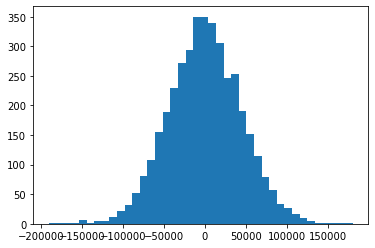

In [69]:
plt.hist(err_train, bins = 40);

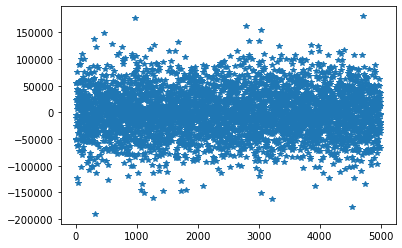

In [70]:
plt.plot(err_train, "*");

In [71]:
pred_Actual = pd.DataFrame()
pred_Actual['Actual'] = usa_train_y
pred_Actual['Predicted'] = pred_train

In [72]:
pred_Actual

,Actual,Predicted
163,1.394518e+06,1.405673e+06
3719,1.321743e+06,1.229545e+06
474,1.137059e+06,1.175002e+06
1308,8.549455e+05,9.355021e+05
2038,1.221828e+06,1.178547e+06
...,...,...
1656,1.153517e+06,1.173688e+06
3894,9.434698e+05,9.649681e+05
2912,1.366981e+06,1.286880e+06
1312,9.344923e+05,9.484698e+05


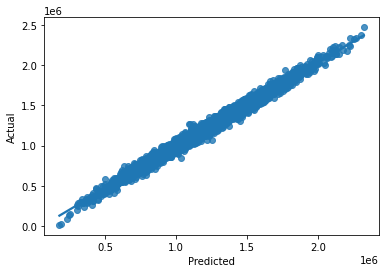

In [73]:
sns.regplot(y = 'Actual', x = 'Predicted', data = pred_Actual );

RSQUARE  ON TRAIN DATA

In [74]:
RFR_usa.score(usa_train_x, usa_train_y)

0.9842927466555732

RSQUARE ON TEST DATA

In [75]:
RFR_usa.score(usa_test_x, usa_test_y)

0.8813860632984009

ADJUSTED RSQUARE

In [76]:
##Adjusted Rsquare
N = usa_train_x.shape[0]
K = usa_train_x.shape[1]
adjRsquare = 1 - ((1-0.9841219935624572)* (N-1) / (N-K-1))
adjRsquare

0.9841021162384243

# MSE

In [77]:
MSE = np.mean(np.square(err_test))
MSE

14739201314.46142

# RMSE

In [78]:
RMSE = np.sqrt(MSE)
RMSE

121405.11239013544

# MAPE

In [79]:
MAPE = np.mean(np.abs(err_test*100/usa_test_y))
MAPE

9.29004279659483

##---------------------------------------------------------------------------------------------------

# SUPPORT VECTOR REGRESSION ALGORITHM

In [80]:
from sklearn.svm import SVR
SVR_usa =  SVR()

In [81]:
SVR_usa.fit(usa_train_x, usa_train_y)

SVR()

In [82]:
pred_train = SVR_usa.predict(usa_train_x)
pred_test = SVR_usa.predict(usa_test_x)

In [83]:
pred_train

array([1231748.93305836, 1231735.44589737, 1231653.38030731, ...,
       1231594.53362449, 1231683.55106934, 1231743.52996255])

In [84]:
pred_test

array([1231849.6245657 , 1231742.61350964, 1231733.72262972,
       1231888.29223709, 1231768.28078663, 1231689.62779368,
       1231773.36960974, 1231711.88417754, 1231605.7720843 ,
       1231602.19961074, 1231770.98380691, 1231512.9446512 ,
       1231741.85029549, 1231644.7449637 , 1231946.39712956,
       1231654.35482024, 1231963.83754455, 1231680.57293414,
       1231634.53496361, 1231508.76227471, 1231817.89353344,
       1231704.53286727, 1231836.14813238, 1231793.76926225,
       1231713.896703  , 1231672.31809693, 1231678.48887727,
       1231760.62419487, 1231720.86391521, 1231730.83902324,
       1231792.49084878, 1231752.04113926, 1231450.77087934,
       1231823.10728929, 1231869.17671216, 1231747.65178996,
       1232004.63598363, 1231699.67850931, 1231786.77932364,
       1231786.71415905, 1231459.40373235, 1231558.20099264,
       1231946.86369934, 1231727.43241565, 1231719.09273488,
       1231684.20688525, 1231935.09685751, 1231704.55848778,
       1231762.99504189,

In [85]:
err_train = usa_train_y - pred_train
err_test = usa_test_y - pred_test

In [86]:
err_train 

163     162769.482409
3719     90007.720277
474     -94594.191823
1308   -376731.129952
2038     -9744.662230
            ...      
1656    -78288.097574
3894   -288114.854385
2912    135386.376256
1312   -297191.208685
4286     40008.901988
Name: Price, Length: 4000, dtype: float64

In [87]:
err_test

538      30644.662263
1479    221569.854420
3387   -152954.225531
4207    454079.355979
1407     60518.814056
            ...      
2143   -664901.026331
3474    183538.702523
2817    507007.047956
813     563238.235401
2098   -189439.590553
Name: Price, Length: 1000, dtype: float64

In [88]:
np.mean(err_train)

-127.22755059982464

# checking assumption

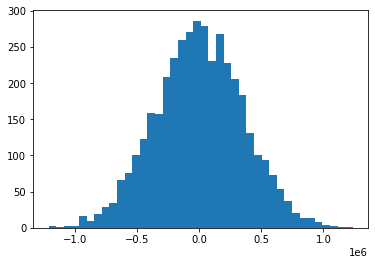

In [89]:
plt.hist(err_train, bins = 40);

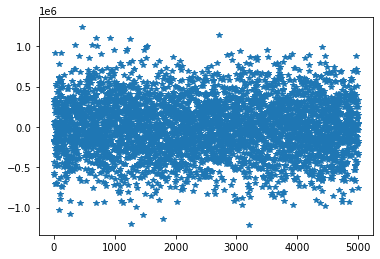

In [90]:
plt.plot(err_train, "*");

In [91]:
pred_Actual = pd.DataFrame()
pred_Actual['Actual'] = usa_train_y
pred_Actual['Predicted'] = pred_train

In [92]:
pred_Actual 

,Actual,Predicted
163,1.394518e+06,1.231749e+06
3719,1.321743e+06,1.231735e+06
474,1.137059e+06,1.231653e+06
1308,8.549455e+05,1.231677e+06
2038,1.221828e+06,1.231572e+06
...,...,...
1656,1.153517e+06,1.231805e+06
3894,9.434698e+05,1.231585e+06
2912,1.366981e+06,1.231595e+06
1312,9.344923e+05,1.231684e+06


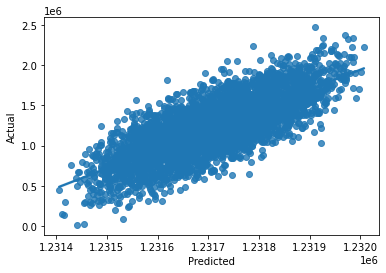

In [93]:
sns.regplot(y = 'Actual', x = 'Predicted', data = pred_Actual );

RSQUARE ON TRAIN DATA 

In [94]:
SVR_usa.score(usa_train_x, usa_train_y)

0.00047099137529693635

In [95]:
SVR_usa.score(usa_test_x, usa_test_y)*100

0.04205537983176244

ADJUSTED RSQUARE ON TRAIN DATA 

In [96]:
##Adjusted Rsquare
N = usa_train_x.shape[0]
K = usa_train_x.shape[1]
adjRsquare = 1 - ((1-0.00044959974987990314)* (N-1) / (N-K-1))
adjRsquare

-0.0008017152228918523

# MSE

In [97]:
MSE = np.mean(np.square(err_test))
MSE

124209710064.92052

# RMSE

In [98]:
RMSE = np.sqrt(MSE)
RMSE

352433.97972516855

# MAPE

In [99]:
MAPE = np.mean(np.abs(err_test*100/usa_test_y))
MAPE

28.79445243033606

# K NEAREST NEIGHBORS REGRESSION ALGORITHM

In [100]:
from sklearn.neighbors import KNeighborsRegressor
KNR_usa = KNeighborsRegressor(n_neighbors=5)

In [101]:
KNR_usa.fit(usa_train_x, usa_train_y)

KNeighborsRegressor()

In [102]:
pred_train = KNR_usa.predict(usa_train_x)
pred_test  = KNR_usa.predict(usa_test_x)

In [103]:
pred_train

array([1312699.77156565, 1542589.90091431, 1063467.29923348, ...,
       1098197.50690454, 1093275.54553282, 1542589.90091431])

In [104]:
pred_test

array([1649941.11406163, 1270106.09025678, 1300632.12993767,
       1725986.49654726, 1446292.57767352, 1226076.69585311,
       1329540.46221151, 1043979.85293894,  834779.4014508 ,
        853378.46529876, 1508961.25744546,  892492.42901905,
       1378239.37833288, 1146680.46448016, 1801774.65472694,
       1071273.14582378, 1893160.21906232, 1091287.01435088,
       1124982.32614198,  928725.83195602, 1303306.41795842,
       1167910.36125877, 1618641.51150279, 1384438.19115319,
       1279762.09886221, 1078588.55644259, 1056164.63001568,
       1195613.04472785, 1054472.83744467, 1257223.84327982,
       1480893.71766824, 1459118.79094318,  518542.03670721,
       1629852.30237078, 1727879.56990733, 1225621.78143506,
       1890292.00356753, 1255991.1182808 , 1450238.55006936,
       1542784.63297279,  573319.28261872,  832385.43558667,
       1742675.3788538 , 1298291.68274535, 1218952.92246232,
       1233450.40245227, 1531275.6814871 , 1081692.61414132,
       1314238.61357751,

In [105]:
err_train= usa_train_y- pred_train
err_test = usa_test_y - pred_test

In [106]:
err_train

163      81818.643902
3719   -220846.734740
474      73591.889251
1308   -165988.504752
2038     95136.402128
            ...      
1656    -89051.796439
3894   -179637.505310
2912    268783.402976
1312   -158783.203148
4286   -270837.468964
Name: Price, Length: 4000, dtype: float64

In [107]:
err_test

538    -387446.827233
1479    183206.377673
3387   -221852.632839
4207    -40018.848332
1407   -154005.482831
            ...      
2143   -223708.031658
3474    -37863.393404
2817    370361.581551
813     324974.573740
2098     16070.854623
Name: Price, Length: 1000, dtype: float64

In [108]:
np.mean(err_train)

270.6982108943257

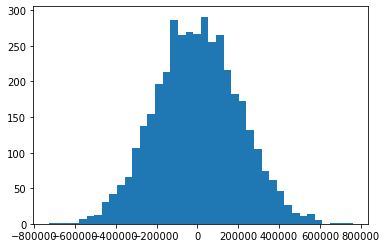

In [109]:
plt.hist(err_train, bins = 40);

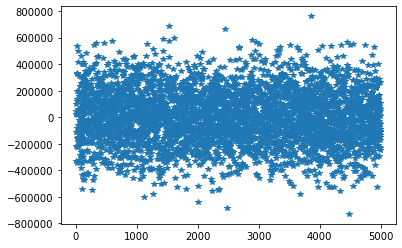

In [110]:
plt.plot(err_train, "*");

In [111]:
pred_Actual = pd.DataFrame()
pred_Actual['Actual'] = usa_train_y
pred_Actual['Predicted'] = pred_train

In [112]:
pred_Actual

,Actual,Predicted
163,1.394518e+06,1.312700e+06
3719,1.321743e+06,1.542590e+06
474,1.137059e+06,1.063467e+06
1308,8.549455e+05,1.020934e+06
2038,1.221828e+06,1.126691e+06
...,...,...
1656,1.153517e+06,1.242569e+06
3894,9.434698e+05,1.123107e+06
2912,1.366981e+06,1.098198e+06
1312,9.344923e+05,1.093276e+06


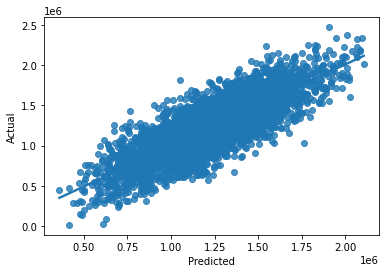

In [113]:
sns.regplot(y = 'Actual', x = 'Predicted', data = pred_Actual );

RSQUARE ON TRAIN DATA

In [114]:
KNR_usa.score(usa_train_x, usa_train_y)

0.6646214427551822

RSQUARE ON TEST DATA

In [115]:
KNR_usa.score(usa_test_x, usa_test_y)

0.5080047974998552

ADJUSTED RSQUARE ON TRAIN DATA

In [116]:
##Adjusted Rsquare
N = usa_train_x.shape[0]
K = usa_train_x.shape[1]
adjRsquare = 1 - ((1-0.6578404384395583)* (N-1) / (N-K-1))
adjRsquare

0.6574120964746604

# MSE

In [117]:
MSE = np.mean(np.square(err_test))
MSE

61136292555.924286

# RMSE

In [118]:
RMSE = np.sqrt(MSE)
RMSE

247257.54297073383

# MAPE

In [119]:
MAPE = np.mean(np.abs(err_test*100/usa_test_y))
MAPE

18.92540454083323

===================================================================================================

# BAGGING REGRESSION ALGORITHM

In [120]:
from sklearn.ensemble import BaggingRegressor
BR_usa = BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=10)

In [121]:
BR_usa.fit(usa_train_x, usa_train_y)

BaggingRegressor(estimator=DecisionTreeRegressor())

In [122]:
pred_train = BR_usa.predict(usa_train_x)
pred_test = BR_usa.predict(usa_test_x)

In [123]:
pred_train

array([1361501.17115111, 1289292.47281611, 1184405.77757592, ...,
       1361270.95329306,  966944.07476151, 1302950.22476975])

In [124]:
pred_test

array([1289813.71735438, 1485584.50683987,  896291.91004312,
       1513941.5881302 , 1250216.2306621 , 1127794.72792159,
       1677301.47143028,  757949.7856604 , 1199236.04702374,
       1116145.80841551, 1116003.08659754,  489168.48731015,
        988223.15898618, 1331677.00528083, 1935999.29067201,
        870394.62330974, 1686371.75058722, 1375532.35239878,
        988661.47314286,  915651.39657448, 1810206.73034369,
       1092098.47570645, 1772250.00099493, 1393079.21718782,
       1601376.20337367, 1190416.49486582,  951088.55558202,
       1468746.1928383 , 1247089.85313884, 1237463.3549093 ,
       1281382.02638724, 1397722.49801731,  482771.00846731,
       1664880.3594408 , 1729375.52669145, 1459327.08626208,
       2080367.96749676, 1130385.44536064, 1366619.4241383 ,
       1432476.45423165,  371164.6196861 ,  567799.82029272,
       1852012.56906618, 1024819.5232807 , 1156669.40607094,
        912247.24963214, 1781789.65601587, 1090180.01407003,
       1193776.31583712,

In [125]:
err_train = usa_train_y - pred_train
err_test = usa_test_y - pred_test

In [126]:
err_train 

163      33017.244317
3719     32450.693358
474     -47346.589092
1308   -118944.142374
2038     19257.773180
            ...      
1656      1160.039356
3894     -9851.741778
2912      5709.956588
1312    -32451.732377
4286    -31197.792820
Name: Price, Length: 4000, dtype: float64

In [127]:
np.mean(err_train)

1360.2610676926308

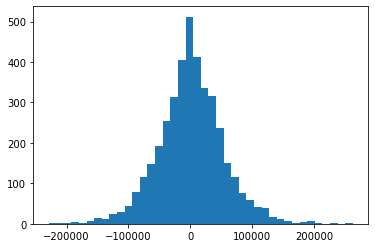

In [128]:
plt.hist(err_train, bins = 40);

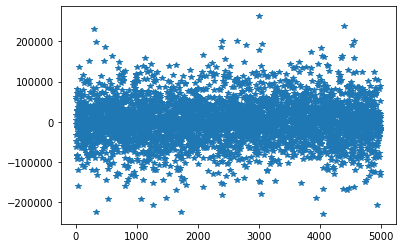

In [129]:
plt.plot(err_train, "*");

In [130]:
pred_Actual = pd.DataFrame()
pred_Actual['Actual'] = usa_train_y
pred_Actual['Predicted'] = pred_train

In [131]:
pred_Actual

,Actual,Predicted
163,1.394518e+06,1.361501e+06
3719,1.321743e+06,1.289292e+06
474,1.137059e+06,1.184406e+06
1308,8.549455e+05,9.738896e+05
2038,1.221828e+06,1.202570e+06
...,...,...
1656,1.153517e+06,1.152357e+06
3894,9.434698e+05,9.533215e+05
2912,1.366981e+06,1.361271e+06
1312,9.344923e+05,9.669441e+05


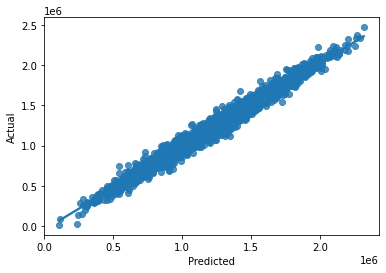

In [132]:
sns.regplot(y = 'Actual', x = 'Predicted', data = pred_Actual );

RSQUARE ON TRAIN DATA

In [133]:
BR_usa.score(usa_train_x, usa_train_y)

0.9773515908026041

RSQUARE ON TEST DATA

In [134]:
BR_usa.score(usa_test_x, usa_test_y)

0.8683417590800648

ADJUSTED RSQUARE ON TRAIN DATA

In [135]:
N = usa_train_x.shape[0]
K = usa_train_x.shape[1]
adjRsquare = 1 - ((1-0.8817050688057482)* (N-1) / (N-K-1))
adjRsquare

0.8815569780055551

# MSE

In [136]:
MSE = np.mean(np.square(err_test))
MSE

16360112239.665909

# RMSE

In [137]:
RMSE = np.sqrt(MSE)
RMSE

127906.65439947176

# MAPE

In [138]:
MAPE = np.mean(np.abs(err_test*100/usa_test_y))
MAPE

9.603233872593236

##---------------------------------------------------------------------------------------------

# PASTING REGRESSION

In [139]:
from sklearn.ensemble import BaggingRegressor
pasting_regressor_usa = BaggingRegressor(estimator=LinearRegression(),n_estimators=10)

In [140]:
pasting_regressor_usa.fit(usa_train_x, usa_train_y)

BaggingRegressor(estimator=LinearRegression())

In [141]:
pred_train = pasting_regressor_usa.predict(usa_train_x)
pred_test = pasting_regressor_usa.predict(usa_test_x)

In [142]:
pred_train

array([1466728.48857859, 1148759.82457103, 1277642.01519068, ...,
       1211043.23680958, 1013502.79507883, 1385074.65104943])

In [143]:
pred_test

array([1239210.98605399, 1417270.95719618, 1060151.8339907 ,
       1472138.46592957, 1243278.74774803, 1064579.28318271,
       1577035.82827692,  654868.85465991, 1072341.79271278,
       1089361.1424269 , 1124372.81619059,  296154.54047639,
        933451.01950414, 1463830.13342546, 2245978.61295258,
        840701.32928135, 1785190.98973442, 1336665.66660745,
        897726.7396368 ,  866628.70813119, 1708816.56000771,
       1133924.82845653, 1769937.76899849, 1374695.33235341,
       1644040.30377922, 1203813.92837654,  993239.48823127,
       1469759.88596014, 1068009.75933668, 1217054.71508705,
       1331196.2321591 , 1388829.92376495,  480104.98783792,
       1696333.75999519, 1800985.18836433, 1442159.96742344,
       2228825.01385866, 1188480.4112414 , 1347635.26386951,
       1278353.5652753 ,  370473.06205827,  532882.95648924,
       1895665.77971131, 1055148.40946398, 1144552.16929042,
        859107.06166326, 1761875.051803  , 1185126.53370626,
       1233301.56925475,

In [144]:
err_train = usa_train_y - pred_train
err_test = usa_test_y - pred_test

In [145]:
err_train

163     -72210.073111
3719    172983.341603
474    -140582.826706
1308   -226825.671096
2038     93073.886035
            ...      
1656   -124193.937612
3894    -51826.911285
2912    155937.673071
1312    -79010.452694
4286   -113322.219099
Name: Price, Length: 4000, dtype: float64

In [146]:
err_test

538      23283.300775
1479     36041.510734
3387     18627.663108
4207    213829.182286
1407     49008.347095
            ...      
2143    -46363.908559
3474     56301.124358
2817      9672.656919
813      39328.200919
2098     35031.438687
Name: Price, Length: 1000, dtype: float64

In [147]:
np.mean(err_train)

230.54485019087048

# CHECKING ASSUMPTION

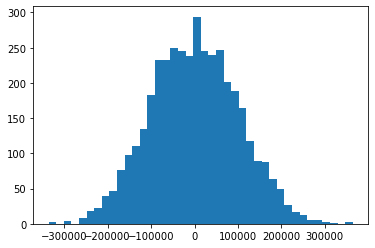

In [148]:
plt.hist(err_train, bins = 40);

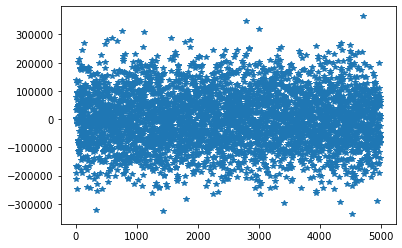

In [149]:
plt.plot(err_train, "*");

In [150]:
pred_Actual = pd.DataFrame()
pred_Actual['Actual'] = usa_train_y
pred_Actual['Predicted'] = pred_train

In [151]:
pred_Actual

,Actual,Predicted
163,1.394518e+06,1.466728e+06
3719,1.321743e+06,1.148760e+06
474,1.137059e+06,1.277642e+06
1308,8.549455e+05,1.081771e+06
2038,1.221828e+06,1.128754e+06
...,...,...
1656,1.153517e+06,1.277711e+06
3894,9.434698e+05,9.952967e+05
2912,1.366981e+06,1.211043e+06
1312,9.344923e+05,1.013503e+06


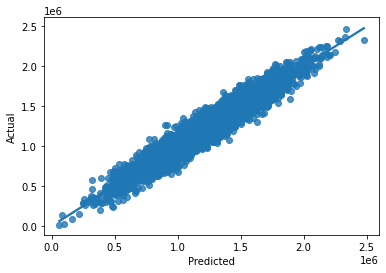

In [152]:
sns.regplot(y = 'Actual', x = 'Predicted', data = pred_Actual );

RSQUARE ON TRAIN DATA

In [153]:
pasting_regressor_usa.score(usa_train_x, usa_train_y)

0.9186332897888985

RSQUARE ON TEST DATA

In [154]:
pasting_regressor_usa.score(usa_test_x, usa_test_y)

0.9155272540409125

ADJUSTED RSQUARE ON TRAIN DATA

In [155]:
N = usa_train_x.shape[0]
K = usa_train_x.shape[1]
adjRsquare = 1 - ((1-0.9173412873567679)* (N-1) / (N-K-1))
adjRsquare

0.9172378087480508

# MSE

In [156]:
MSE = np.mean(np.square(err_test))
MSE

10496749731.935707

# RMSE

In [157]:
RMSE = np.sqrt(MSE)
RMSE

102453.64674786206

# MAPE

In [158]:
MAPE = np.mean(np.abs(err_test*100/usa_test_y))
MAPE

7.677189070463007

# ---------------------------------------------------------------------------------

# ADABOOST REGRESSION ALGORITHM

In [159]:
##boosting
from sklearn.ensemble import AdaBoostRegressor
abr_usa = AdaBoostRegressor(estimator=DecisionTreeRegressor(),n_estimators=50)

In [160]:
abr_usa.fit(usa_train_x, usa_train_y)

AdaBoostRegressor(estimator=DecisionTreeRegressor())

In [161]:
pred_train = abr_usa.predict(usa_train_x)
pred_test = abr_usa.predict(usa_test_x)

In [162]:
pred_train

array([1394518.41546763, 1321743.16617417, 1137059.18848432, ...,
       1366980.90988088,  934492.34238447, 1271752.43195011])

In [163]:
pred_test

array([1210366.52882268, 1370909.95193431,  946479.23486147,
       1539329.31884732, 1306056.56543002, 1086829.24563268,
       1575680.03697001,  845890.24051291, 1242316.9909078 ,
       1123851.14141145, 1106261.2737053 ,  485533.68035769,
        961311.72917377, 1452153.84905844, 2138713.94334063,
        871325.261278  , 1754866.39547833, 1347578.53033792,
        940229.23433028,  832475.18901532, 1744932.21099093,
       1084763.02966111, 1850513.52744405, 1329007.20344815,
       1537765.66056849, 1251430.92031862, 1002192.58207068,
       1359838.99857874, 1267150.83668714, 1191625.43996274,
       1281113.31524688, 1409038.98711763,  426906.18286889,
       1670950.31275687, 1727592.6372201 , 1557075.42231083,
       2030910.61534552, 1178553.61617926, 1314359.45438074,
       1388782.88740135,  454055.65585268,  589969.64292793,
       1883469.24354168, 1070240.01962079, 1140579.61789309,
        970825.59638398, 1746086.98892861, 1080464.85168353,
       1162735.27192427,

In [164]:
err_train = usa_train_y - pred_train
err_test = usa_test_y - pred_test

In [165]:
err_train

163     0.0
3719    0.0
474     0.0
1308    0.0
2038    0.0
       ... 
1656    0.0
3894    0.0
2912    0.0
1312    0.0
4286    0.0
Name: Price, Length: 4000, dtype: float64

In [166]:
np.mean(err_train)

-1.8765125915209646

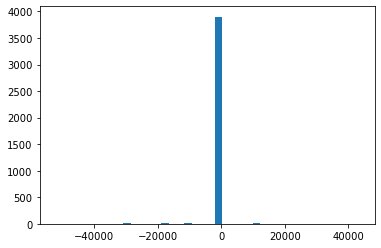

In [167]:
plt.hist(err_train, bins = 40);

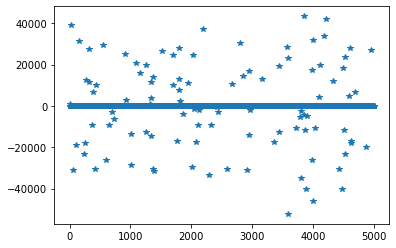

In [168]:
plt.plot(err_train, "*");

In [169]:
pred_Actual = pd.DataFrame()
pred_Actual['Actual'] = usa_train_y
pred_Actual['Predicted'] = pred_train

In [170]:
pred_Actual

,Actual,Predicted
163,1.394518e+06,1.394518e+06
3719,1.321743e+06,1.321743e+06
474,1.137059e+06,1.137059e+06
1308,8.549455e+05,8.549455e+05
2038,1.221828e+06,1.221828e+06
...,...,...
1656,1.153517e+06,1.153517e+06
3894,9.434698e+05,9.434698e+05
2912,1.366981e+06,1.366981e+06
1312,9.344923e+05,9.344923e+05


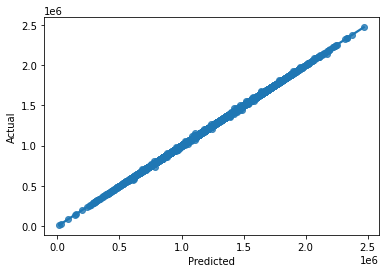

In [171]:
sns.regplot(y = 'Actual', x = 'Predicted', data = pred_Actual );

RSQUARE ON TRAIN DATA

In [172]:
abr_usa.score(usa_train_x, usa_train_y)

0.9999006985761665

RSQUARE ON TEST DATA

In [173]:
abr_usa.score(usa_test_x, usa_test_y)

0.8756358493854263

In [174]:
N = usa_train_x.shape[0]
K = usa_train_x.shape[1]
adjRsquare = 1 - ((1-0.9998754564722503)* (N-1) / (N-K-1))
adjRsquare

0.9998753005589707

# MSE

In [175]:
MSE = np.mean(np.square(err_test))
MSE

15453734216.929451

# RMSE

In [176]:
RMSE = np.sqrt(MSE)
RMSE

124313.04926245454

# MAPE

In [177]:
MAPE = np.mean(np.abs(err_test*100/usa_test_y))
MAPE

9.447575339786638

# ----------------------------------------------------------------------------------------

# GRADIENT BOOST REGRESSION ALGORITHM

In [178]:

from sklearn.ensemble import GradientBoostingRegressor
gbr_usa = GradientBoostingRegressor()

In [179]:
gbr_usa.fit(usa_train_x, usa_train_y)

GradientBoostingRegressor()

In [180]:
pred_train = gbr_usa.predict(usa_train_x)
pred_test = gbr_usa.predict(usa_test_x)

In [181]:
pred_train

array([1446289.35175921, 1150074.00346032, 1241501.28796094, ...,
       1252394.71475355,  961647.19326625, 1342530.2557563 ])

In [182]:
pred_test

array([1233522.97149868, 1361567.16605224,  986057.19165406,
       1492933.82445361, 1258604.44273746, 1100818.54028681,
       1543705.55297451,  776644.12306501, 1108628.59840747,
       1102175.97444026, 1093426.55946008,  400703.53833594,
        936818.03344487, 1443723.22699007, 2213547.05400623,
        804612.899949  , 1773606.28604565, 1362532.20946042,
        976540.88649601,  841453.71224075, 1728757.29289432,
       1152026.26334863, 1717051.40248914, 1354549.53103577,
       1599559.62224272, 1211716.3436327 , 1008684.39832959,
       1451831.02990742, 1102618.50800826, 1169936.1461616 ,
       1343118.63486072, 1428096.87516719,  416546.52148031,
       1719598.12526856, 1733247.65296593, 1462321.8333718 ,
       2212282.74514594, 1169529.64430069, 1333404.03235007,
       1335271.24880238,  364987.16752543,  565806.10548145,
       1882053.91479759, 1062402.75378431, 1195233.82542535,
        926271.90998301, 1714934.06311342, 1212890.96982488,
       1202642.56140909,

In [183]:
err_train = usa_train_y - pred_train
err_test = usa_test_y - pred_test

In [184]:
err_train

163     -51770.936292
3719    171669.162714
474    -104442.099477
1308   -195545.671064
2038     67143.075485
            ...      
1656   -101100.383845
3894    -71808.148370
2912    114586.195127
1312    -27154.850882
4286    -70777.823806
Name: Price, Length: 4000, dtype: float64

In [185]:
np.mean(err_train)

1.2718373909592628e-11

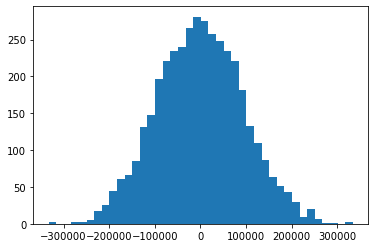

In [186]:
plt.hist(err_train, bins = 40);

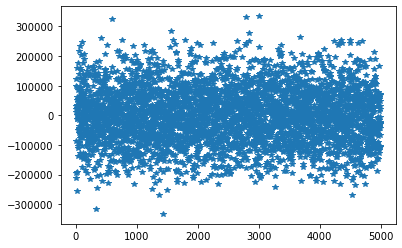

In [187]:
plt.plot(err_train, "*");

In [188]:
pred_Actual = pd.DataFrame()
pred_Actual['Actual'] = usa_train_y
pred_Actual['Predicted'] = pred_train

In [189]:
pred_Actual

,Actual,Predicted
163,1.394518e+06,1.446289e+06
3719,1.321743e+06,1.150074e+06
474,1.137059e+06,1.241501e+06
1308,8.549455e+05,1.050491e+06
2038,1.221828e+06,1.154685e+06
...,...,...
1656,1.153517e+06,1.254617e+06
3894,9.434698e+05,1.015278e+06
2912,1.366981e+06,1.252395e+06
1312,9.344923e+05,9.616472e+05


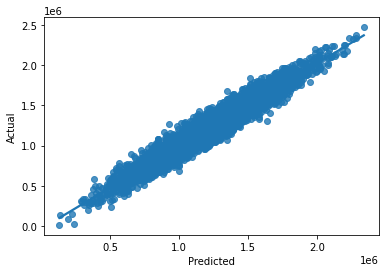

In [190]:
sns.regplot(y = 'Actual', x = 'Predicted', data = pred_Actual );

RSQUARE ON TRAIN DATA

In [191]:
gbr_usa.score(usa_train_x, usa_train_y)

0.9290360302291125

RSQUARE ON TEST DATA

In [192]:
gbr_usa.score(usa_test_x, usa_test_y)

0.9026393853222829

ADJUSTED RSQUARE ON TRAIN DATA

In [193]:
N = usa_train_x.shape[0]
K = usa_train_x.shape[1]
adjRsquare = 1 - ((1-0.9300856623576501)* (N-1) / (N-K-1))
adjRsquare

0.9299981381492847

# MSE

In [194]:
MSE = np.mean(np.square(err_test))
MSE

12098221673.939547

# RMSE

In [195]:
RMSE = np.sqrt(MSE)
RMSE

109991.91640270455

# MAPE

In [196]:
MAPE = np.mean(np.abs(err_test*100/usa_test_y))
MAPE

8.413142831548223

# ================================================

# data visualization

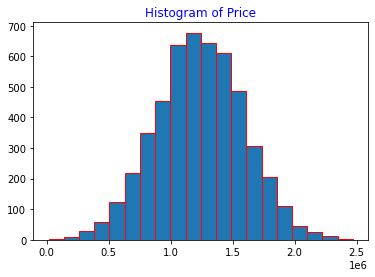

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
usa = pd.read_csv(r"D:\USA_Housing.csv")
# Extract the target column
target_column = 'Price'  
target_data = usa[target_column]

# Set the number of bins
num_bins = 20

# Create the histogram
plt.hist(target_data, bins=num_bins, edgecolor='red')

# Add labels and t
plt.title('Histogram of ' + target_column, color = 'b')

# Display the histogram
plt.show()






SCATTER PLOT: PRICE VS AVG.AREA INCOME

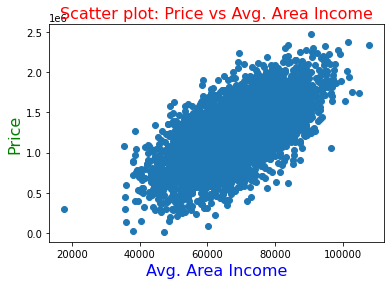

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
usa = pd.read_csv(r"D:\USA_Housing.csv")
target_column = 'Price'  
feature_column = 'Avg. Area Income'   
# Extract the target and feature data
target_data = usa[target_column]
feature_data = usa[feature_column]

# Create the scatter plot
plt.scatter(feature_data, target_data)

# Add labels and title
plt.xlabel(feature_column, color = 'b', fontsize = 16)
plt.ylabel(target_column, color = 'g', fontsize = 16 )
plt.title('Scatter plot: ' + target_column + ' vs ' + feature_column, color = 'r', fontsize = 16)

# Display the scatter plot
plt.show()


SCATTER PLOT:PRICE VS AVG.AREA HOUSE AGE

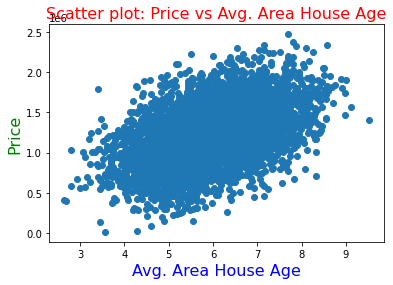

In [199]:
usa = pd.read_csv(r"D:\USA_Housing.csv")
target_column = 'Price'
feature_column = 'Avg. Area House Age'   
target_data = usa[target_column]
feature_data = usa[feature_column]
plt.scatter(feature_data, target_data)
plt.xlabel(feature_column, color = 'b', fontsize = 16)
plt.ylabel(target_column, color = 'g', fontsize = 16 )
plt.title('Scatter plot: ' + target_column + ' vs ' + feature_column, color = 'r', fontsize = 16)
               
plt.show()

SCATTER PLOT: PRICE VS AVG.AREA NUMBER OF ROOMS

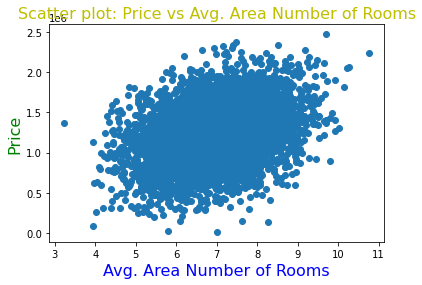

In [200]:
usa = pd.read_csv(r"D:\USA_Housing.csv")
target_column = 'Price'
feature_column =  'Avg. Area Number of Rooms'  
target_data = usa[target_column]
feature_data = usa[feature_column]
plt.scatter(feature_data, target_data)
plt.xlabel(feature_column, color = 'b', fontsize = 16)
plt.ylabel(target_column, color = 'g', fontsize = 16 )
plt.title('Scatter plot: ' + target_column + ' vs ' + feature_column, color = 'y', fontsize = 16)
               
plt.show()

SCATTER PLOT: PRICE VS AVG.AREA NUMBER OF BEDROOMS

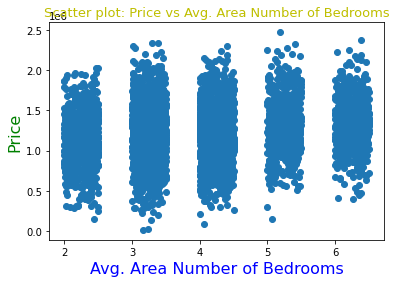

In [203]:
usa = pd.read_csv(r"D:\USA_Housing.csv")
target_column = 'Price'
feature_column =  'Avg. Area Number of Bedrooms'  
target_data = usa[target_column]
feature_data = usa[feature_column]
plt.scatter(feature_data, target_data)
plt.xlabel(feature_column, color = 'b', fontsize = 16)
plt.ylabel(target_column, color = 'g', fontsize = 16 )
plt.title('Scatter plot: ' + target_column + ' vs ' + feature_column, color = 'y', fontsize = 13)
               
plt.show()

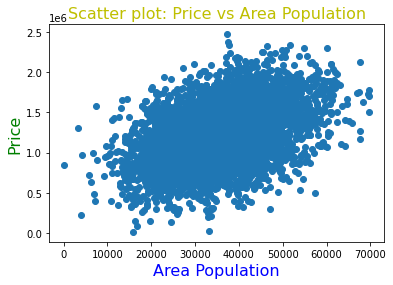

In [202]:
usa = pd.read_csv(r"D:\USA_Housing.csv")
target_column = 'Price'
feature_column = 'Area Population' 
target_data = usa[target_column]
feature_data = usa[feature_column]
plt.scatter(feature_data, target_data)
plt.xlabel(feature_column, color = 'b', fontsize = 16)
plt.ylabel(target_column, color = 'g', fontsize = 16 )
plt.title('Scatter plot: ' + target_column + ' vs ' + feature_column, color = 'y', fontsize = 16)
               
plt.show()

# 

# REPORT

# CONCLUSION

AFTER COMPARING THE RSQUARE SCORE OF ALL MODELS RANDOM FOREST IS BEST AMONG THE ALL REGRESSION MODELS.